In [1]:
import math
import time
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


In [2]:
a, b = -2, 2

def conditional_probability_to_survive(t, x, y, k_arr=range(-1, 1)):
    ans = 0
    for k in k_arr:
        ans += (
                exp(((y - x) ** 2 - (y - x + 2 * k * (b - a)) ** 2) / (2 * t))
                - exp(((y - x) ** 2 - (y + x - 2 * a + 2 * k * (b - a)) ** 2) / (2 * t))
        )
    return ans

In [3]:
from mpmath import *
mp.dps = 5; mp.pretty = True

In [4]:
def conditional_probability_to_survive_2(t, x, y):
    return sqrt(2*pi*t)*exp((y - x)**2/2/t)*(jtheta(3,pi*(x-y)/2/(a-b),exp(-pi**2*t/2/(b-a)**2))-jtheta(3,pi*(y+x-2*a)/2/(b-a),exp(-pi**2*t/2/(b-a)**2)))/2/(b-a)

In [5]:
conditional_probability_to_survive_2(0.3,1.9861419200897217,-1.986928939819336)

-0.16642

In [6]:
conditional_probability_to_survive(0.3,1.9861419200897217,-1.986928939819336,range(-5, 5))

0.089236

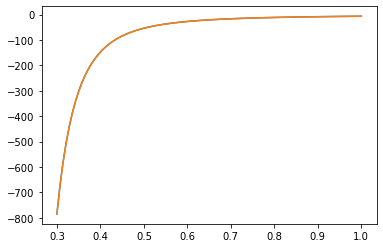

In [18]:
c = (lambda t: conditional_probability_to_survive(t,1,3,range(-1, 1)))
c_2 = (lambda t: conditional_probability_to_survive_2(t,1,3))

t = np.linspace(0.3,1,100)
c_vect = np.vectorize(c)
c_2_vect = np.vectorize(c_2)

plt.plot(t,c_vect(t))
plt.plot(t,c_2_vect(t))
plt.show()